<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass4/hpdp/BERUK/Assignment4_Flight_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Feature Engineering for Flight Data**

Group: BERUK

Muhammad Hasan Bin Che Abdullah
<br>
A21EC0077

##**1. Dataset Selection**
dataset by [BARKINGDATA](https://www.kaggle.com/datasets/polartech/flight-data-with-1-million-or-more-records)<br>

Global Flight Data Covering top popular airports from Europe, Asia, America, Africa from April to September of the year 2022.

With about 1 million rows of records.Each row contains the following fields:

`from_airport_code`: Code representing the departure airport.

`from_country`: Country of the departure airport.

`dest_airport_code`: Code representing the destination airport.

`dest_country`: Country of the destination airport.

`aircraft_type`: Type or model of the aircraft.

`airline_number`: Numerical identifier for the airline.

`airline_name`: Name of the airline.

`flight_number`: Unique identifier for a specific flight.

`departure_time`: Time when the flight departs.

`arrival_time`: Time when the flight arrives.

`duration`: Duration of the flight in a specific unit (e.g., minutes).

`stops`: Number of stops during the flight.

`price`: Cost of the flight ticket.

`currency`: Currency in which the price is specified.

`co2_emissions`: Amount of carbon dioxide emissions for the flight.

`co2_percentage`: Percentage of carbon dioxide emissions in relation to the average for the flight route.

`scan_date`: Date when the flight data was recorded or scanned.

###**Downloading Kaggle data sets directly into Colab**

Install the kaggle python library

In [1]:
! pip install kaggle

Mount the Google drive so you can store your kaggle API credentials for future use

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Make a directory for kaggle at the temporary instance location on Colab drive.

Download your kaggle API key (.json file). You can do this by going to your kaggle account page and clicking 'Create new API token' under the API section.

In [3]:
! mkdir ~/.kaggle

If you want to copy the kaggle API credentials to the temporary location... (I recommend placing it on your Google Drive)

In [4]:
#! cp kaggle.json ~/.kaggle/

Upload the json file to Google Drive and then copy to the temporary location.

In [5]:
!cp /content/drive/MyDrive/Colab_Notebooks/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json


Change the file permissions to read/write to the owner only

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

Download datasets (that are not part of competition)

In [7]:
! kaggle datasets download polartech/flight-data-with-1-million-or-more-records

 89% 17.0M/19.1M [00:01<00:00, 18.3MB/s]
100% 19.1M/19.1M [00:01<00:00, 15.2MB/s]


Unzip, in case the downloaded file is zipped. Refresh the files on the left hand side to update the view.

In [8]:
! unzip flight-data-with-1-million-or-more-records.zip

Archive:  flight-data-with-1-million-or-more-records.zip
  inflating: flight data.csv         


##**2. Loading the Dataset**
Import the necessary libraries and configurations for feature engineering and EDA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
warnings.filterwarnings('ignore')


<ipython-input-1-c4515a693c57>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


## **3. Exploratory Data Analysis (EDA)**

Before we can do any feature engineering, we need to perform a basic exploratory data analysis to understand the dataset's characteristics. This includes checking for missing values, understanding the data types, and getting a sense of the dataset's structure.


In [2]:
# Read data
df = pd.read_csv("/content/flight data.csv")
df = df.astype(np.uint8, errors='ignore') # reduce memory footprint

In [11]:
df.head(10)

,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
0,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,145,3,1279.0,USD,1320000.0,1320000.0,0%,2022-04-29 17:52:59
1,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,145,3,1279.0,USD,1195000.0,1320000.0,-9%,2022-04-29 17:52:59
2,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 10:15:00,250,3,1284.0,USD,1248000.0,1320000.0,-5%,2022-04-29 17:52:59
3,ALG,Algeria,AEP,Argentina,Airbus A318|Airbus A320|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,145,3,1290.0,USD,1347000.0,1320000.0,2%,2022-04-29 17:52:59
4,ALG,Algeria,AEP,Argentina,Airbus A321neo|Boeing 777|Airbus A320,multi,[Lufthansa| LATAM],LH1317|LH1317|LH1317,2022-04-30 12:35:00,2022-05-01 10:15:00,4,2,1347.0,USD,1381000.0,1320000.0,4%,2022-04-29 17:52:59
5,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 16:50:00,28,3,1279.0,USD,1320000.0,1320000.0,0%,2022-04-29 17:52:59
6,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 16:50:00,28,3,1279.0,USD,1195000.0,1320000.0,-9%,2022-04-29 17:52:59
7,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Airbus A330|Airbus A320,multi,[Air France| Iberia| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 10:15:00,250,3,1284.0,USD,1373000.0,1320000.0,4%,2022-04-29 17:52:59
8,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Airbus A330|Airbus A320,multi,[Air France| Iberia| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 16:50:00,133,3,1284.0,USD,1373000.0,1320000.0,4%,2022-04-29 17:52:59
9,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 16:50:00,133,3,1284.0,USD,1248000.0,1320000.0,-5%,2022-04-29 17:52:59


We'll first find out information on the dataset including data types, null value counts and unique value counts.

In [13]:
# rows and columns in the df
df.shape

(998866, 18)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998866 entries, 0 to 998865
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   from_airport_code                998866 non-null  object 
 1   from_country                     998866 non-null  object 
 2   dest_airport_code                998866 non-null  object 
 3   dest_country                     998866 non-null  object 
 4   aircraft_type                    984952 non-null  object 
 5   airline_number                   998866 non-null  object 
 6   airline_name                     998866 non-null  object 
 7   flight_number                    998866 non-null  object 
 8   departure_time                   998866 non-null  object 
 9   arrival_time                     998866 non-null  object 
 10  duration                         998866 non-null  uint8  
 11  stops                            998866 non-null  uint8  
 12  pr

In [15]:
class DfOverview:
    """
        Give an overview for a given data frame,
        like null persentage for each columns,
        unique value percentage for each columns and more
    """

    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    def missing_value(self) -> None:
        nullSum = self.df.isna().sum()
        return [col for col in nullSum]

    def percentage(self, list):
        return [str(round(((value / self.df.shape[0]) * 100), 2)) + '%' for value in list]

    def getOverview(self) -> None:

        _columns = [column for column in self.df]
        _count = self.df.count().values
        _unique = [self.df[column].value_counts().shape[0] for column in self.df]
        _missing_values = self.missing_value()

        columns = [
            'Column',
            'count',
            'missing_value_count',
            'Missing_value_percentage',
            'unique_value_count',
            'unique_value_percentage',
            'dtype']
        data = zip(
            _columns,
            _count,
            _missing_values,
            self.percentage(_missing_values),
            _unique,
            self.percentage(_unique),
            self.df.dtypes
        )
        new_df = pd.DataFrame(data=data, columns=columns)
        return new_df

# Here we can see detailed informations of the columns including the amount missing and unique values.
df_overview = DfOverview(df)
df_overview.getOverview()

,Column,count,missing_value_count,Missing_value_percentage,unique_value_count,unique_value_percentage,dtype
0,from_airport_code,998866,0,0.0%,31,0.0%,object
1,from_country,998866,0,0.0%,18,0.0%,object
2,dest_airport_code,998866,0,0.0%,78,0.01%,object
3,dest_country,998866,0,0.0%,47,0.0%,object
4,aircraft_type,984952,13914,1.39%,25675,2.57%,object
5,airline_number,998866,0,0.0%,185,0.02%,object
6,airline_name,998866,0,0.0%,11012,1.1%,object
7,flight_number,998866,0,0.0%,22064,2.21%,object
8,departure_time,998866,0,0.0%,4288,0.43%,object
9,arrival_time,998866,0,0.0%,21164,2.12%,object


In [16]:
def show_cols_mixed_dtypes(df):
    mixed_dtypes = {'Column': [], 'Data type': []}
    for col in df.columns:
        dtype = pd.api.types.infer_dtype(df[col])
        if dtype.startswith("mixed"):
            mixed_dtypes['Column'].append(col)
            mixed_dtypes['Data type'].append(dtype)
    if len(mixed_dtypes['Column']) == 0:
        print('None of the columns contain mixed types.')
    else:
        print(pd.DataFrame(mixed_dtypes))

show_cols_mixed_dtypes(df)

None of the columns contain mixed types.


## **4. Feature Selection**

We then choose the important information for your analysis. You can do this by checking how things are connected, using what you already know, or figuring out which parts matter the most. After deciding, make a new table with only the chosen important parts.

In [3]:
# Drop rows with missing values since we have more than enough data points
df = df.dropna()

Scikit-learn has two mutual information metrics in its feature_selection module: one for real-valued targets (mutual_info_regression) and one for categorical targets (mutual_info_classif). Our target, price, is real-valued. The next cell computes the MI scores for our features and wraps them up in a nice dataframe.

In [5]:
X = df.copy()
y = X.pop("price")

In [4]:
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

KeyboardInterrupt: ignored

We visualise it in a bar-plot for ease of comparison

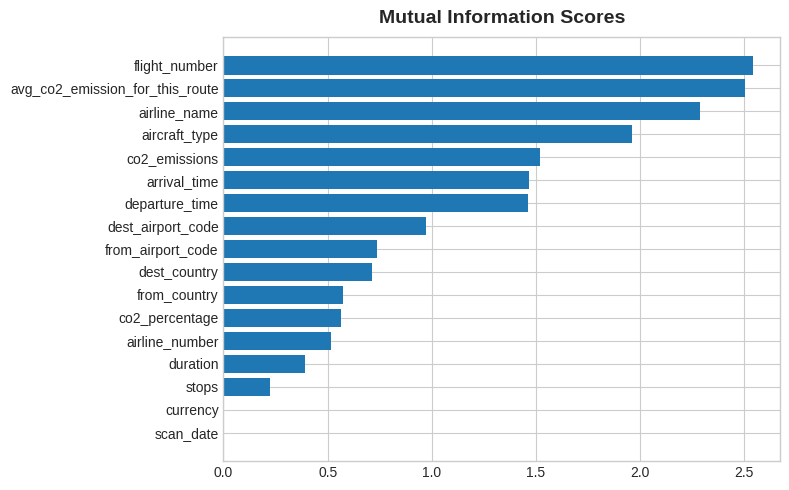

In [19]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Data visualization is a great follow-up to a utility ranking. Let's take a closer look at a couple of these.

We have some surprising finds from these comparisons, namely the relation between price and average/CO2 emissions, stops' and duration's low MI score among others.

currency and scan_date have a 0.0 MI score because both only consist of 1 unique value, which are USD and 29/4/2022 respectively, which also means both fields are not useful enough for our analysis.

If we plot the relation between price and flight number, it wouldn't be suitable as the flight_number in itself does not contain much information other than helpful for instantising specific flights, but it does imply a strong relation between types of flights with the pricing:

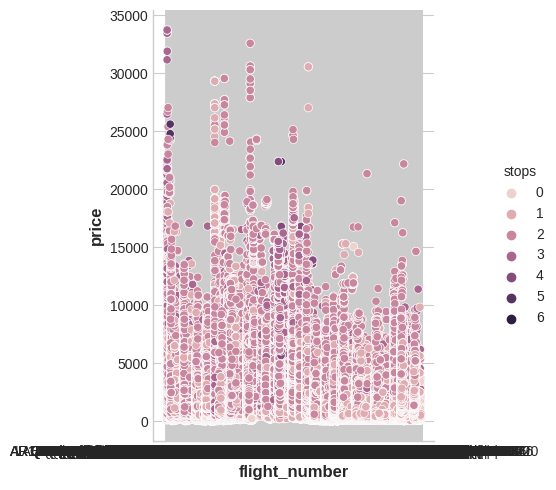

In [20]:
sns.relplot(x="flight_number", y="price", hue="stops",  data=df);

We can visualise the relationship between avg_co2_emission_for_this_route and price with the aircraft_type as the separating factor.

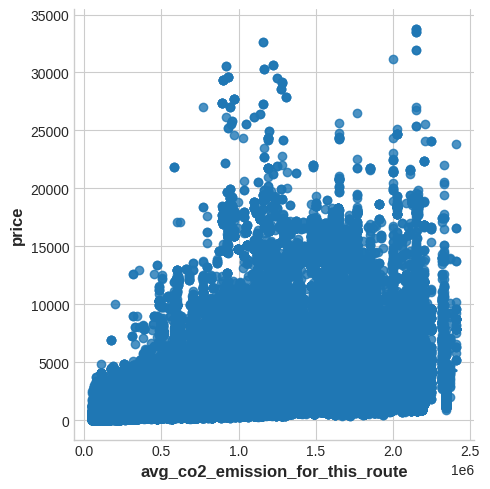

In [21]:
sns.lmplot(x="avg_co2_emission_for_this_route", y="price", data=df);
# Didn't include hue = aircraft_type or aother columns because google collab could not run it

Drop the columns that are not informative for our analysis (MI scores 0.0) or not of our interests.

In [5]:
df.drop(['scan_date', 'currency', 'co2_percentage'], axis=1, inplace=True)
df.head(10)

,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,co2_emissions,avg_co2_emission_for_this_route
0,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,145,3,1279.0,1320000.0,1320000.0
1,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,145,3,1279.0,1195000.0,1320000.0
2,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 10:15:00,250,3,1284.0,1248000.0,1320000.0
3,ALG,Algeria,AEP,Argentina,Airbus A318|Airbus A320|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,145,3,1290.0,1347000.0,1320000.0
4,ALG,Algeria,AEP,Argentina,Airbus A321neo|Boeing 777|Airbus A320,multi,[Lufthansa| LATAM],LH1317|LH1317|LH1317,2022-04-30 12:35:00,2022-05-01 10:15:00,4,2,1347.0,1381000.0,1320000.0
5,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 16:50:00,28,3,1279.0,1320000.0,1320000.0
6,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 16:50:00,28,3,1279.0,1195000.0,1320000.0
7,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Airbus A330|Airbus A320,multi,[Air France| Iberia| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 10:15:00,250,3,1284.0,1373000.0,1320000.0
8,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Airbus A330|Airbus A320,multi,[Air France| Iberia| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 16:50:00,133,3,1284.0,1373000.0,1320000.0
9,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 16:50:00,133,3,1284.0,1248000.0,1320000.0


In [6]:
#current shape of dataset
print("New Shape: ", df.shape)

New Shape:  (892539, 15)


## **5. Feature Preprocessing**

The process of transforming and manipulating the features (columns) in your dataset to make them more suitable for analysis or modeling. It may include feature engineering, handling missing values and outliers, encoding values and scaling numerical values among others.

### **Min-Max Scaling**

Min-Max scaling is a method of standardizing numerical features in a dataset. It transforms the values of the features to a specific range, typically [0, 1], making the features comparable and ensuring they do not dominate each other in terms of scale.

In [6]:
numerical_cols = ['duration', 'price', 'co2_emissions', 'avg_co2_emission_for_this_route']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the selected columns and transform the data
X_minmax = df.copy()

X_minmax[numerical_cols] = scaler.fit_transform(X_minmax[numerical_cols])

###**Z-Score Standardisation**

Now, on the standardised numerical columns, we can find and remove any outlier values using zscore tool from the scipy library.

In [7]:
z_scores = zscore(X_minmax[['duration', 'price', 'co2_emissions', 'avg_co2_emission_for_this_route']])

# Define a threshold for considering data points as outliers (e.g., z_score_threshold = 3)
outliers = (abs(z_scores) > 3).all(axis=1)

# Remove outliers from the DataFrame
X_no_outliers = X_minmax[~outliers]

In [9]:
# get the columns with object data type
string_columns = X_no_outliers.select_dtypes(include='object').columns.tolist()
string_columns

['from_airport_code',
 'from_country',
 'dest_airport_code',
 'dest_country',
 'aircraft_type',
 'airline_number',
 'airline_name',
 'flight_number',
 'departure_time',
 'arrival_time']

In [10]:
def convert_to_string(X_no_outliers, columns):
    for col in columns:
        X_no_outliers[col] = X_no_outliers[col].astype("string")

convert_to_string(X_no_outliers, string_columns)
X_no_outliers.dtypes

from_airport_code                   string
from_country                        string
dest_airport_code                   string
dest_country                        string
aircraft_type                       string
airline_number                      string
airline_name                        string
flight_number                       string
departure_time                      string
arrival_time                        string
duration                           float64
stops                                uint8
price                              float64
co2_emissions                      float64
avg_co2_emission_for_this_route    float64
dtype: object

In [8]:
X_new = X_no_outliers.copy()

#current shape of dataset
print("New Shape: ", X_new.shape)

New Shape:  (892539, 18)


## **6. Feature Transformation**

Feature transformation refers to the process of modifying or converting the features (variables or columns) in a dataset to make them more suitable for analysis or modeling. The goal is to enhance the information in the features or to meet certain assumptions of machine learning algorithms. Feature transformation can involve a variety of techniques, and the choice often depends on the characteristics of the data and the requirements of the modeling task.

### **Log Transformation**

Log transformation is a technique used to stabilize the variance and make the distribution of a variable more symmetric. It's commonly applied to data that exhibit right-skewness (a long right tail) and have a wide range of values. Logarithmic transformation can help in handling such scenarios.

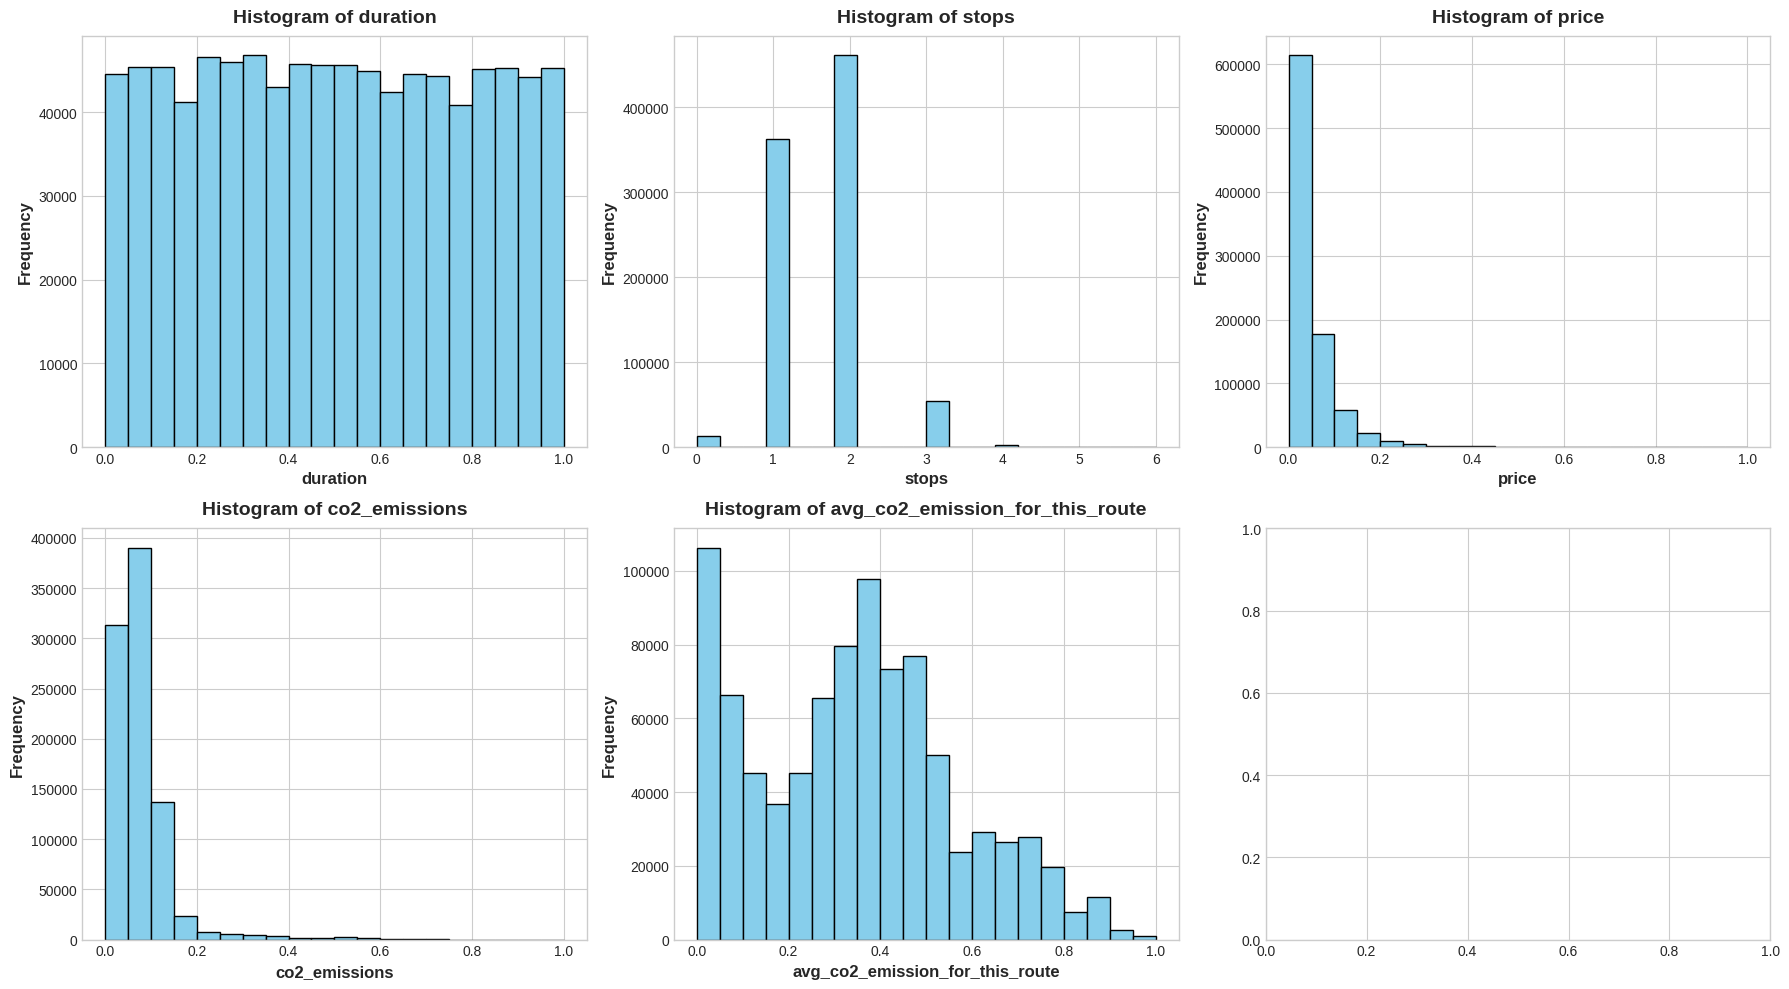

In [9]:
selected_columns = ['duration', 'stops', 'price', 'co2_emissions', 'avg_co2_emission_for_this_route']

# Create a figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot histograms for each selected column
for i, col in enumerate(selected_columns):
    X_new[col].plot(kind='hist', ax=axes[i], bins=20, edgecolor='black', color='skyblue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### **One-Hot Encoding**

One-hot encoding is a technique used to convert categorical variables into a format that can be provided to machine learning algorithms to improve predictive performance. It is particularly useful for handling categorical data that doesn't have an ordinal relationship e.g. from_country and dest_country. We select these two among the many categorical data types because they are nominal and have relatively few unique values: 18 and 47 respectively.

In [10]:
X_encoded = pd.get_dummies(X_new, columns=['from_country', 'dest_country'])
X_encoded.head()

,from_airport_code,dest_airport_code,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,...,dest_country_Spain,dest_country_Sweden,dest_country_Taiwan,dest_country_Thailand,dest_country_Turkey,dest_country_United Arab Emirates,dest_country_United Kingdom,dest_country_United States,dest_country_Vietnam,dest_country_Zurich
0,ALG,AEP,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,0.568627,3,...,0,0,0,0,0,0,0,0,0,0
1,ALG,AEP,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,0.568627,3,...,0,0,0,0,0,0,0,0,0,0
2,ALG,AEP,Airbus A320|Airbus A321|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 10:15:00,0.980392,3,...,0,0,0,0,0,0,0,0,0,0
3,ALG,AEP,Airbus A318|Airbus A320|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,0.568627,3,...,0,0,0,0,0,0,0,0,0,0
4,ALG,AEP,Airbus A321neo|Boeing 777|Airbus A320,multi,[Lufthansa| LATAM],LH1317|LH1317|LH1317,2022-04-30 12:35:00,2022-05-01 10:15:00,0.015686,2,...,0,0,0,0,0,0,0,0,0,0


## **7. Feature Creation**

Create new features if they can provide valuable information. This could involve combining or aggregating existing features or engineering new ones based on domain knowledge

Since for some flights there are multiple trips we can **aggregate** the rows of same flights to find total duration of flights

In [11]:
# Group by specified columns and aggregate
df_aggregated = df.groupby(['price', 'aircraft_type', 'airline_number', 'airline_name', 'flight_number','departure_time', 'arrival_time', 'dest_airport_code', 'from_airport_code', 'stops', 'duration'], as_index=False).agg({
    'from_country': 'first',
    'dest_country': 'first',
    'co2_emissions': 'sum',   # Summing the 'co2_emissions' values
})

df_aggregated.head(10)

,price,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,dest_airport_code,from_airport_code,stops,duration,from_country,dest_country,co2_emissions
0,9.0,Boeing 737,FR,[Ryanair],FR9839,2022-05-03 15:05:00,2022-05-03 16:00:00,MAN,CPH,0,115,Denmark,United Kingdom,125000.0
1,9.0,Boeing 737,FR,[Ryanair],FR9839,2022-05-07 23:05:00,2022-05-07 23:59:00,MAN,CPH,0,114,Denmark,United Kingdom,125000.0
2,11.0,Airbus A321neo,W6,[Wizz Air],W65702,2022-07-28 17:40:00,2022-07-28 18:55:00,LGW,VIE,0,135,Austria,United Kingdom,114000.0
3,12.0,Boeing 737,FR,[Ryanair],FR120,2022-05-30 06:30:00,2022-05-30 07:50:00,LGW,DUB,0,80,Dublin,United Kingdom,76000.0
4,14.0,Boeing 737,FR,[Ryanair],FR112,2022-05-03 07:35:00,2022-05-03 09:00:00,LGW,DUB,0,85,Dublin,United Kingdom,76000.0
5,14.0,Boeing 737,FR,[Ryanair],FR112,2022-05-30 07:30:00,2022-05-30 08:50:00,LGW,DUB,0,80,Dublin,United Kingdom,76000.0
6,14.0,Boeing 737,FR,[Ryanair],FR114,2022-05-30 11:05:00,2022-05-30 12:25:00,LGW,DUB,0,80,Dublin,United Kingdom,76000.0
7,14.0,Boeing 737,FR,[Ryanair],FR116,2022-05-03 15:35:00,2022-05-03 17:00:00,LGW,DUB,0,85,Dublin,United Kingdom,76000.0
8,14.0,Boeing 737,FR,[Ryanair],FR116,2022-05-30 15:35:00,2022-05-30 16:55:00,LGW,DUB,0,80,Dublin,United Kingdom,76000.0
9,14.0,Boeing 737,FR,[Ryanair],FR118,2022-05-30 19:20:00,2022-05-30 20:40:00,LGW,DUB,0,80,Dublin,United Kingdom,76000.0


In [15]:
df_aggregated.shape

(838394, 14)

## **8. Visualisation**

Visualize the transformed data to gain insights into feature distributions and relationships.

### **Bar Chart (Freuency vs From_/Dest_Countries)**

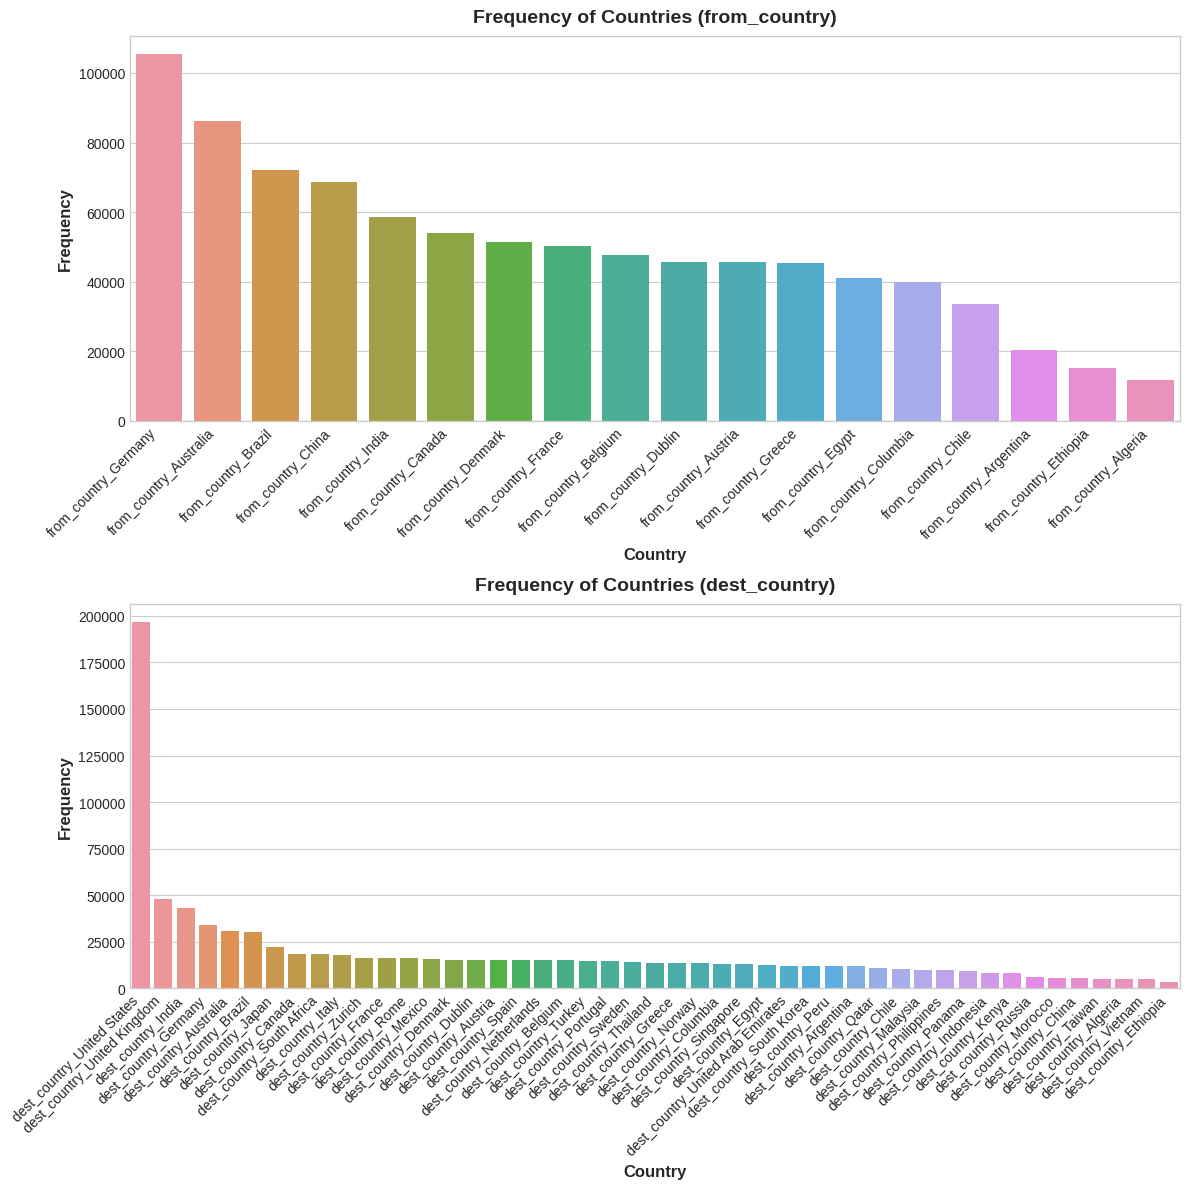

In [16]:
# Bar chart visualising the recurring items of one-hot encoded columns (from/dest_countries)
from_countries_columns = [col for col in X_encoded.columns if 'from_country' in col]
dest_countries_columns = [col for col in X_encoded.columns if 'dest_country' in col]

# Bar chart for 'from_country'
from_countries_frequency = X_encoded[from_countries_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 12))

# Subplot 1: Bar chart for 'from_country'
plt.subplot(2, 1, 1)
sns.barplot(x=from_countries_frequency.index, y=from_countries_frequency.values)
plt.title('Frequency of Countries (from_country)')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Subplot 2: Bar chart for 'dest_country'
dest_countries_frequency = X_encoded[dest_countries_columns].sum().sort_values(ascending=False)
plt.subplot(2, 1, 2)
sns.barplot(x=dest_countries_frequency.index, y=dest_countries_frequency.values)
plt.title('Frequency of Countries (dest_country)')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Also we can find out what the average price for the top 50 most popular airlines are from the aggregated dataset.

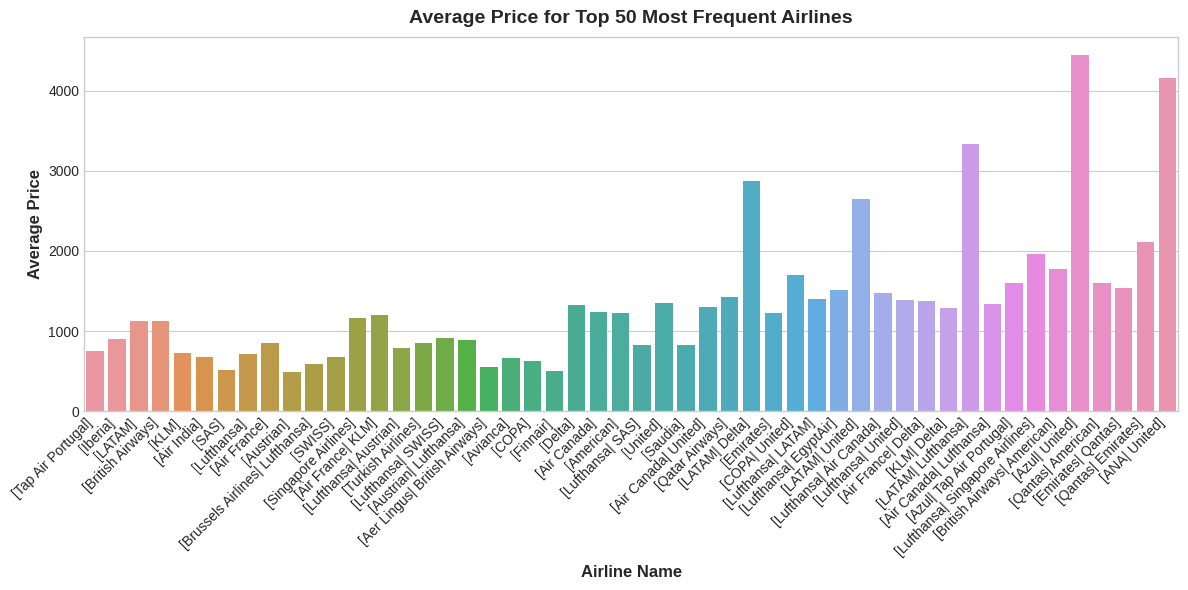

In [17]:
top_airlines = df_aggregated['airline_name'].value_counts().nlargest(50).index
filtered_df = df_aggregated[df_aggregated['airline_name'].isin(top_airlines)]

plt.figure(figsize=(12, 6))
sns.barplot(x='airline_name', y='price', data=filtered_df, ci=None)
plt.title('Average Price for Top 50 Most Frequent Airlines')
plt.xlabel('Airline Name')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

### **Histogram Comparisons between Pre&Post Logarithmic Transformation**

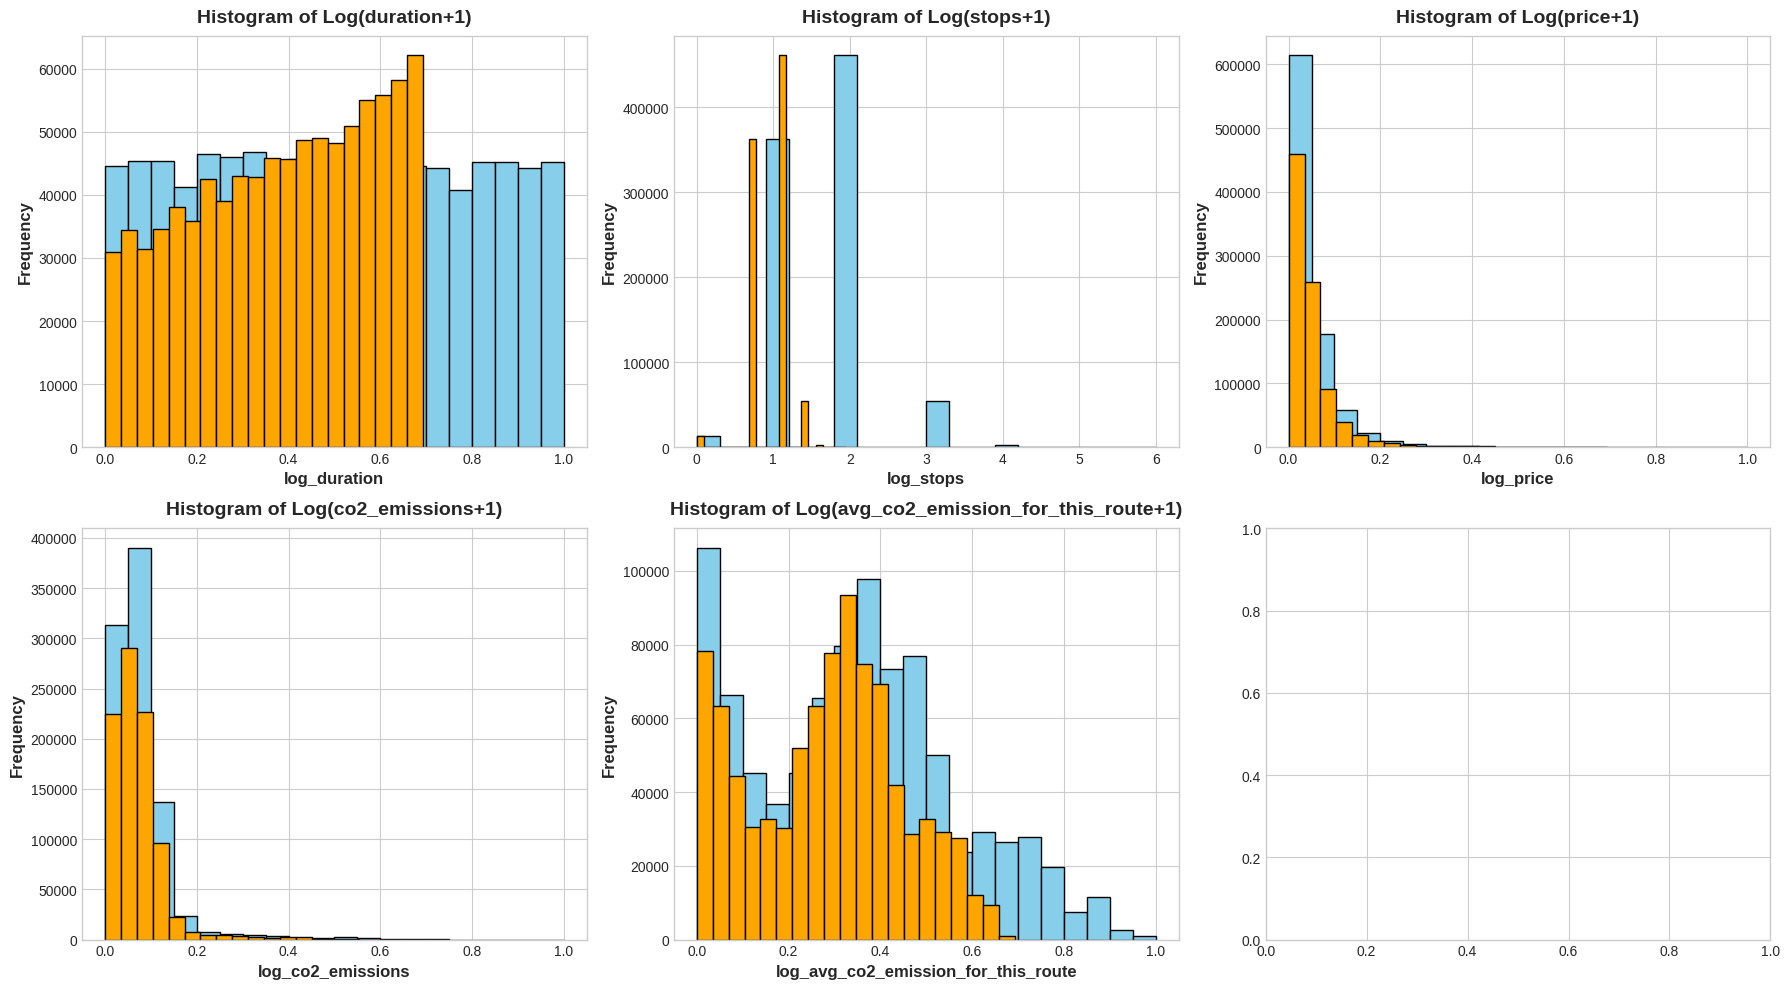

In [18]:
selected_columns = ['duration', 'stops', 'price', 'co2_emissions', 'avg_co2_emission_for_this_route']

# Create a figure with two rows and the number of columns based on the selected variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot histograms for each selected column
for i, col in enumerate(selected_columns):
    # Original variable histogram
    X_new[col].plot(kind='hist', ax=axes[i], bins=20, edgecolor='black', color='skyblue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

    # Log-transformed variable
    log_col = f'log_{col}'
    X_new[log_col] = np.log1p(X_new[col])

    # Log-transformed variable histogram
    X_new[log_col].plot(kind='hist', ax=axes[i], bins=20, edgecolor='black', color='orange')
    axes[i].set_title(f'Histogram of Log({col}+1)')
    axes[i].set_xlabel(log_col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### **Linear-Regression Model**

In [12]:
X = df.copy()
y = X.pop("price")

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X[['duration', 'stops', 'co2_emissions', 'avg_co2_emission_for_this_route']], y, test_size=0.2, random_state=42)

# Now, X_train and y_train are our training features and target, and X_test and y_test are our testing features and target
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1711623.4505828414
R-squared: 0.5059465689323769


In [19]:
X = X_encoded.copy()
y = X.pop("price")

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X.select_dtypes(include=[np.number]), y, test_size=0.2, random_state=42)

# Now, X_train and y_train are our training features and target, and X_test and y_test are our testing features and target
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0012402264849251346
R-squared: 0.59244840904968


### **K-Means Clustering**

The choice of variables for k-means clustering depends on the nature of our data and the goals of our analysis. In general, k-means clustering works well with numerical features because it relies on distance metrics to form clusters. However, it can also be applied to categorical features after appropriate encoding. We will use two numerical features that have possible close correlations.

In [ ]:
from sklearn.cluster import KMeans

# Selecting features for clustering
features_for_clustering = X_new[['price', 'co2_emissions']]

# Assuming you want to find 3 clusters (you can adjust the number of clusters)
n_clusters = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X_encoded['cluster'] = kmeans.fit_predict(features_for_clustering)

# Visualize the clusters (example: using a pairplot)
sns.pairplot(X_encoded, hue='cluster', palette='viridis', diag_kind='kde')
plt.show()